**İstanbul University-Cerrahpaşa**\
**Faculty of Engineering** - **Department of Computer Engineering**\
**Introduction to Machine Learning Final Project** \
\
Fatih Bedir - 1306220024 \
Çağan Karan - 1306220087

---

**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**Loading The Dataset and Understanding Data**

In [ ]:
#Loading dataset
tbp = pd.read_csv('data.csv')
tbp.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
tbp.shape

(6819, 96)

In [ ]:
tbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# Checking for missing values
tbp.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [ ]:
tbp.isnull().sum().sum()

np.int64(0)

Class Distribution: Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


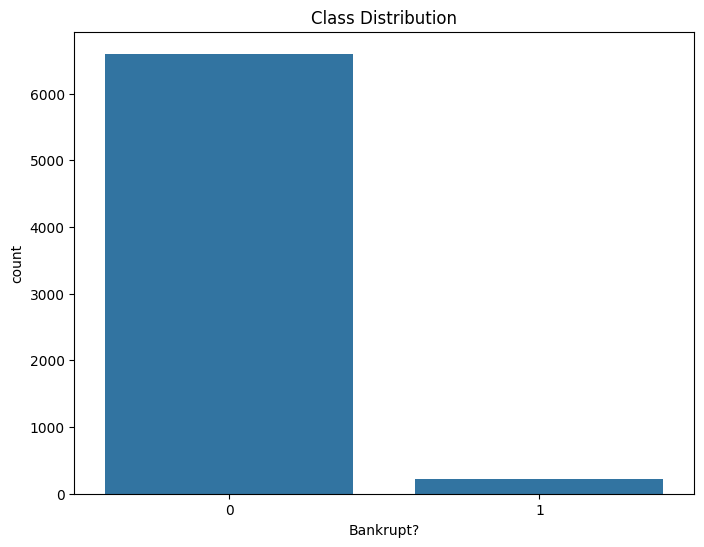

In [ ]:
#Checking for Class Imbalance
target = "Bankrupt?"
print(f"Class Distribution: {tbp[target].value_counts(normalize=True)}")

plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=tbp)
plt.title("Class Distribution")
plt.show()

**Preprocessing**

In [ ]:
y = tbp['Bankrupt?']
X = tbp.drop('Bankrupt?', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Dummy Classifier**

In [ ]:
dummyclass = DummyClassifier(strategy='most_frequent')
dummyclass.fit(X_train_scaled, y_train)
y_pred_dummy = dummyclass.predict(X_test_scaled)
y_prob_dummy = dummyclass.predict_proba(X_test_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_dummy)}")
print(f"Precision: {precision_score(y_test, y_pred_dummy, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_dummy, zero_division=0)}")
print(f"F1 Score: {f1_score(y_test, y_pred_dummy)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_dummy)}")

Accuracy: 0.967741935483871
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


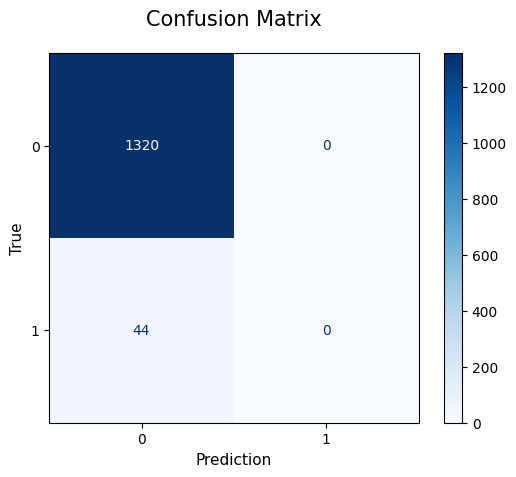

In [ ]:
cm = confusion_matrix(y_test, y_pred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('True', fontsize=11)
plt.show()

**Logistic Regression**

In [ ]:
logisticreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logisticreg.fit(X_train_scaled, y_train)
y_pred_logisticreg = logisticreg.predict(X_test_scaled)
y_prob_logisticreg = logisticreg.predict_proba(X_test_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_logisticreg)}")
print(f"Precision: {precision_score(y_test, y_pred_logisticreg)}")
print(f"Recall: {recall_score(y_test, y_pred_logisticreg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logisticreg)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_logisticreg)}")

Accuracy: 0.8782991202346041
Precision: 0.18556701030927836
Recall: 0.8181818181818182
F1 Score: 0.3025210084033613
ROC AUC Score: 0.9171487603305785


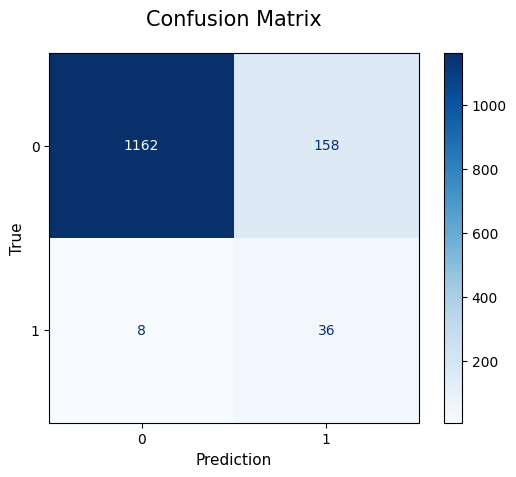

In [ ]:
cm = confusion_matrix(y_test, y_pred_logisticreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('True', fontsize=11)
plt.show()

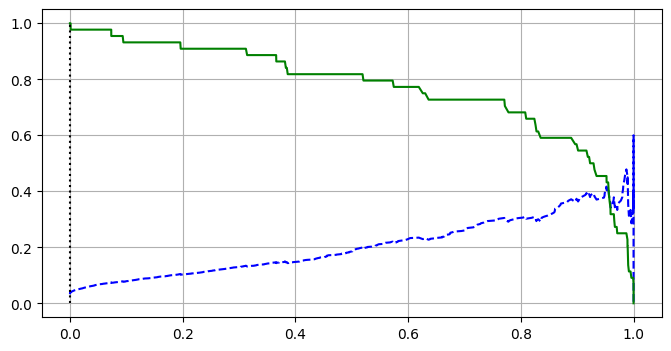

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_logisticreg)
threshold = 0
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.grid()
plt.show()

In [ ]:
print(auc(recalls, precisions))

0.3055055545974928


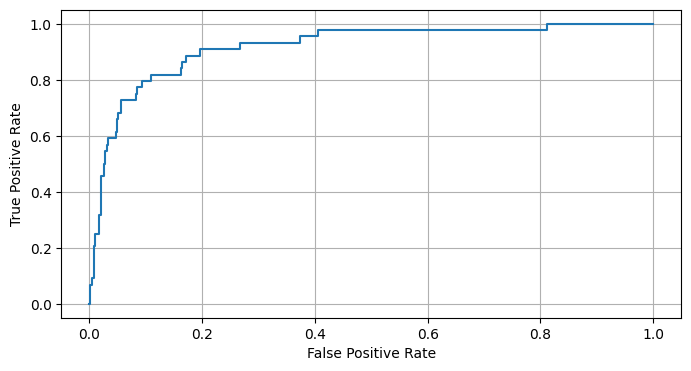

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logisticreg)
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

**Random Forest**

In [ ]:
randomforest = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
randomforest.fit(X_train_scaled, y_train)
y_pred_randomforest = randomforest.predict(X_test_scaled)
y_prob_randomforest = randomforest.predict_proba(X_test_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_randomforest)}")
print(f"Precision: {precision_score(y_test, y_pred_randomforest)}")
print(f"Recall: {recall_score(y_test, y_pred_randomforest)}")
print(f"F1 Score: {f1_score(y_test, y_pred_randomforest)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_randomforest)}")

Accuracy: 0.9699413489736071
Precision: 0.6363636363636364
Recall: 0.1590909090909091
F1 Score: 0.2545454545454545
ROC AUC Score: 0.9347968319559229


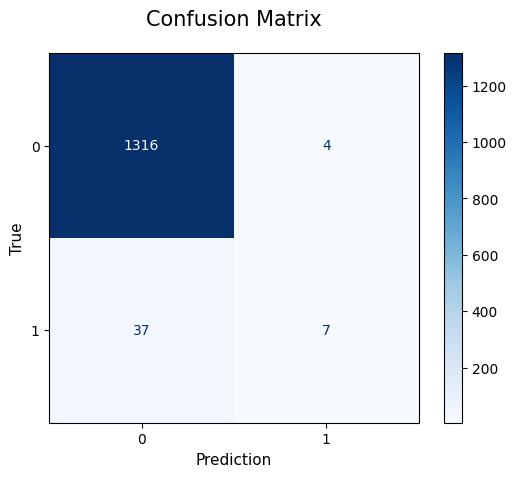

In [ ]:
cm = confusion_matrix(y_test, y_pred_randomforest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('True', fontsize=11)
plt.show()

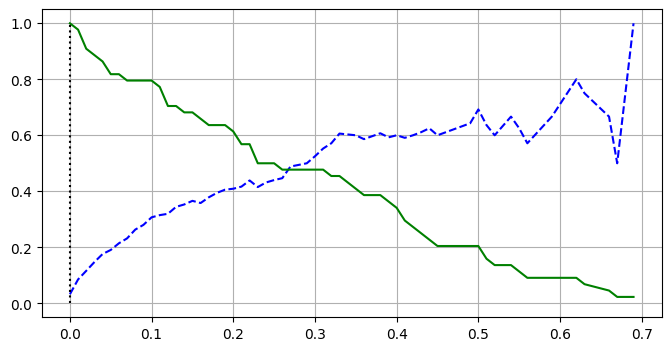

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_randomforest)
threshold = 0
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.grid()
plt.show()

In [ ]:
print(auc(recalls, precisions))

0.45406312922683656


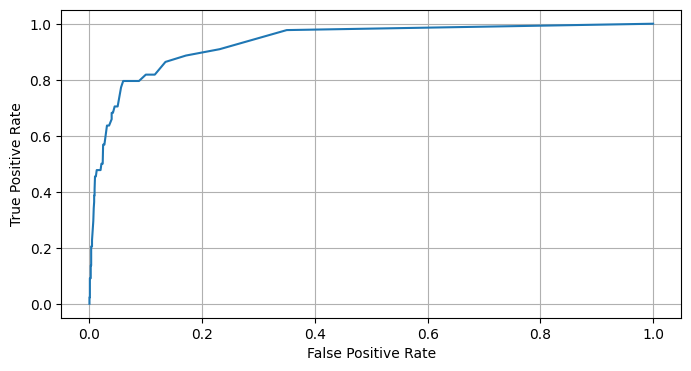

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_randomforest)
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

**Hyperparameter Search**

In [ ]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=parameters,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'n_estimators': 200}

In [ ]:
grid_search.best_score_

np.float64(0.9310049976367928)

In [ ]:
best_randomforest = grid_search.best_estimator_
y_pred_best_randomforest = best_randomforest.predict(X_test_scaled)
y_prob_best_randomforest = best_randomforest.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_randomforest)}")
print(f"Precision: {precision_score(y_test, y_pred_best_randomforest)}")
print(f"Recall: {recall_score(y_test, y_pred_best_randomforest)}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_randomforest)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_best_randomforest)}")

Accuracy: 0.9582111436950147
Precision: 0.39344262295081966
Recall: 0.5454545454545454
F1 Score: 0.45714285714285713
ROC AUC Score: 0.9398932506887052


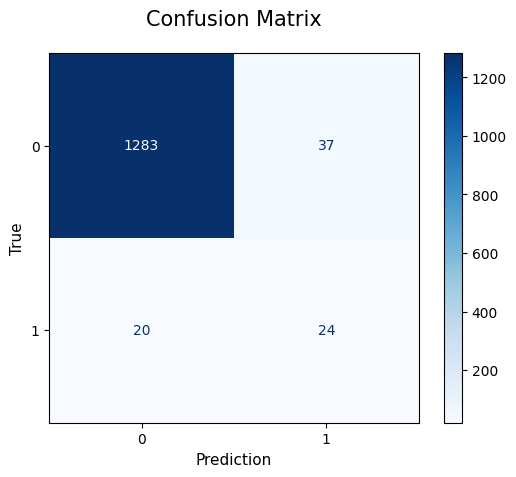

In [ ]:
cm = confusion_matrix(y_test, y_pred_best_randomforest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('True', fontsize=11)
plt.show()

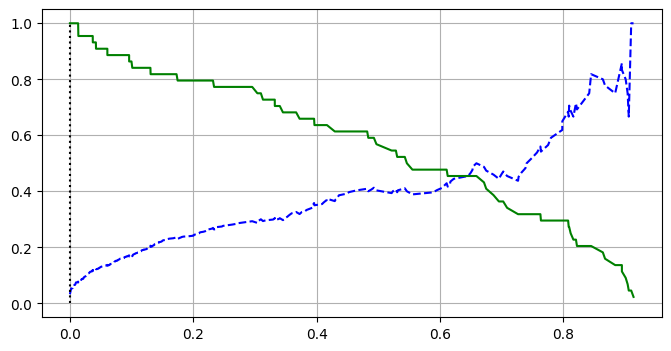

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_best_randomforest)
threshold = 0
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.grid()
plt.show()

In [ ]:
print(auc(recalls, precisions))

0.4602274452128778


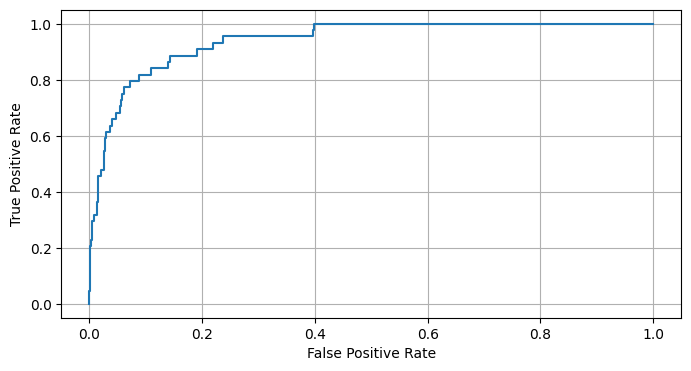

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_randomforest)
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

**Analysis**

/tmp/ipython-input-2442725173.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20), palette='plasma')


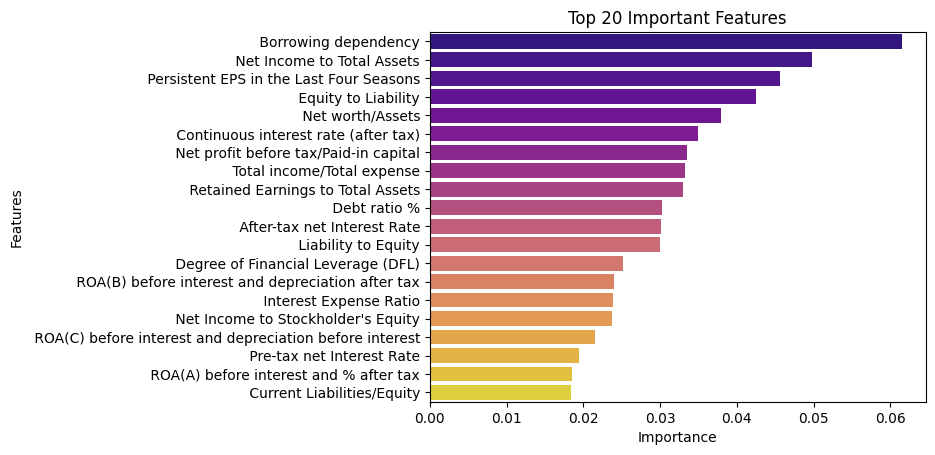

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_randomforest.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20), palette='plasma')
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
feature_importances.head()

,Feature,Importance
39,Borrowing dependency,0.061519
85,Net Income to Total Assets,0.049759
18,Persistent EPS in the Last Four Seasons,0.045639
94,Equity to Liability,0.042439
37,Net worth/Assets,0.037946


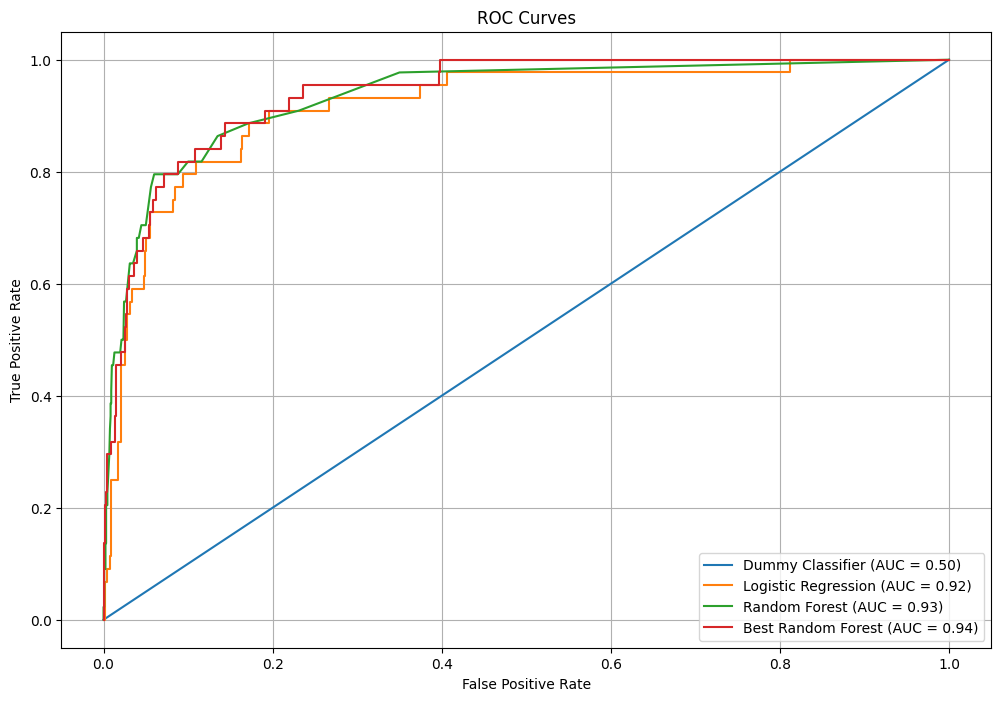

In [ ]:
fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_test, y_prob_dummy)
fpr_logisticreg, tpr_logisticreg, thresholds_logisticreg = roc_curve(y_test, y_prob_logisticreg)
fpr_randomforest, tpr_randomforest, thresholds_randomforest = roc_curve(y_test, y_prob_randomforest)
fpr_best_randomforest, tpr_best_randomforest, thresholds_best_randomforest = roc_curve(y_test, y_prob_best_randomforest)

auc_dummy = roc_auc_score(y_test, y_prob_dummy)
auc_logistic = roc_auc_score(y_test, y_prob_logisticreg)
auc_randomforest = roc_auc_score(y_test, y_prob_randomforest)
auc_best_randomforest = roc_auc_score(y_test, y_prob_best_randomforest)

plt.figure(figsize=(12, 8))
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy Classifier (AUC = {auc_dummy:.2f})')
plt.plot(fpr_logisticreg, tpr_logisticreg, label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
plt.plot(fpr_randomforest, tpr_randomforest, label=f'Random Forest (AUC = {auc_randomforest:.2f})')
plt.plot(fpr_best_randomforest, tpr_best_randomforest, label=f'Best Random Forest (AUC = {auc_best_randomforest:.2f})')
plt.grid(True)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.show()